# Visualization and Exploration

In [1]:
%matplotlib inline
import numpy as np

In [2]:
from datasets import getCandidateInfoList, getCt, LunaDataset

In [3]:
candidateInfo_list = getCandidateInfoList(requireOnDisk_bool=True)

In [4]:
positiveInfo_list = [x for x in candidateInfo_list if x[0]]

In [5]:
len(positiveInfo_list)

1557

In [6]:
candidateInfo_list[1]

CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(48.23675256, 37.47721004, -98.64208784))

In [7]:
diameter_list = [x[1] for x in positiveInfo_list]

In [8]:
diameter_list[::100]

[32.27003025,
 18.54514997,
 13.73620925,
 10.72670328,
 8.70905255,
 7.57464859,
 6.661547445,
 6.054719899,
 5.597494358,
 5.12610172,
 4.730361001,
 4.276776035,
 0.0,
 0.0,
 0.0,
 0.0]

In [9]:
np.histogram(diameter_list)

(array([384, 550, 281, 117,  78,  59,  42,  34,   8,   4], dtype=int64),
 array([ 0.        ,  3.22700302,  6.45400605,  9.68100907, 12.9080121 ,
        16.13501512, 19.36201815, 22.58902117, 25.8160242 , 29.04302722,
        32.27003025]))

In [10]:
from vis import findPositiveSamples, showCandidate
positiveSample_list = findPositiveSamples()

2021-06-12 16:13:07,928 INFO     pid:10880 datasets:183:__init__ <datasets.LunaDataset object at 0x000001D76371B640>: 754975 training samples


0 CandidateInfoTuple(isNodule_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(66.58022805, 82.56931698, -110.5421104))
1 CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(48.23675256, 37.47721004, -98.64208784))
2 CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(44.19, 37.79, -107.01))
3 CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(40.69, 32.19, -97.15))
4 CandidateInfoTuple(isNodule_bool=True, diameter_mm=27.44242293, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.943403138251347598519939390311', center_xyz=(-45.29440163, 74.86925386, -97.52812481))
5 CandidateInfoTuple(isNodule_bool=True, dia

2021-06-12 16:13:10,052 INFO     pid:10880 datasets:183:__init__ <datasets.LunaDataset object at 0x000001D7686933A0>: 680 training samples


<IPython.core.display.Javascript object>


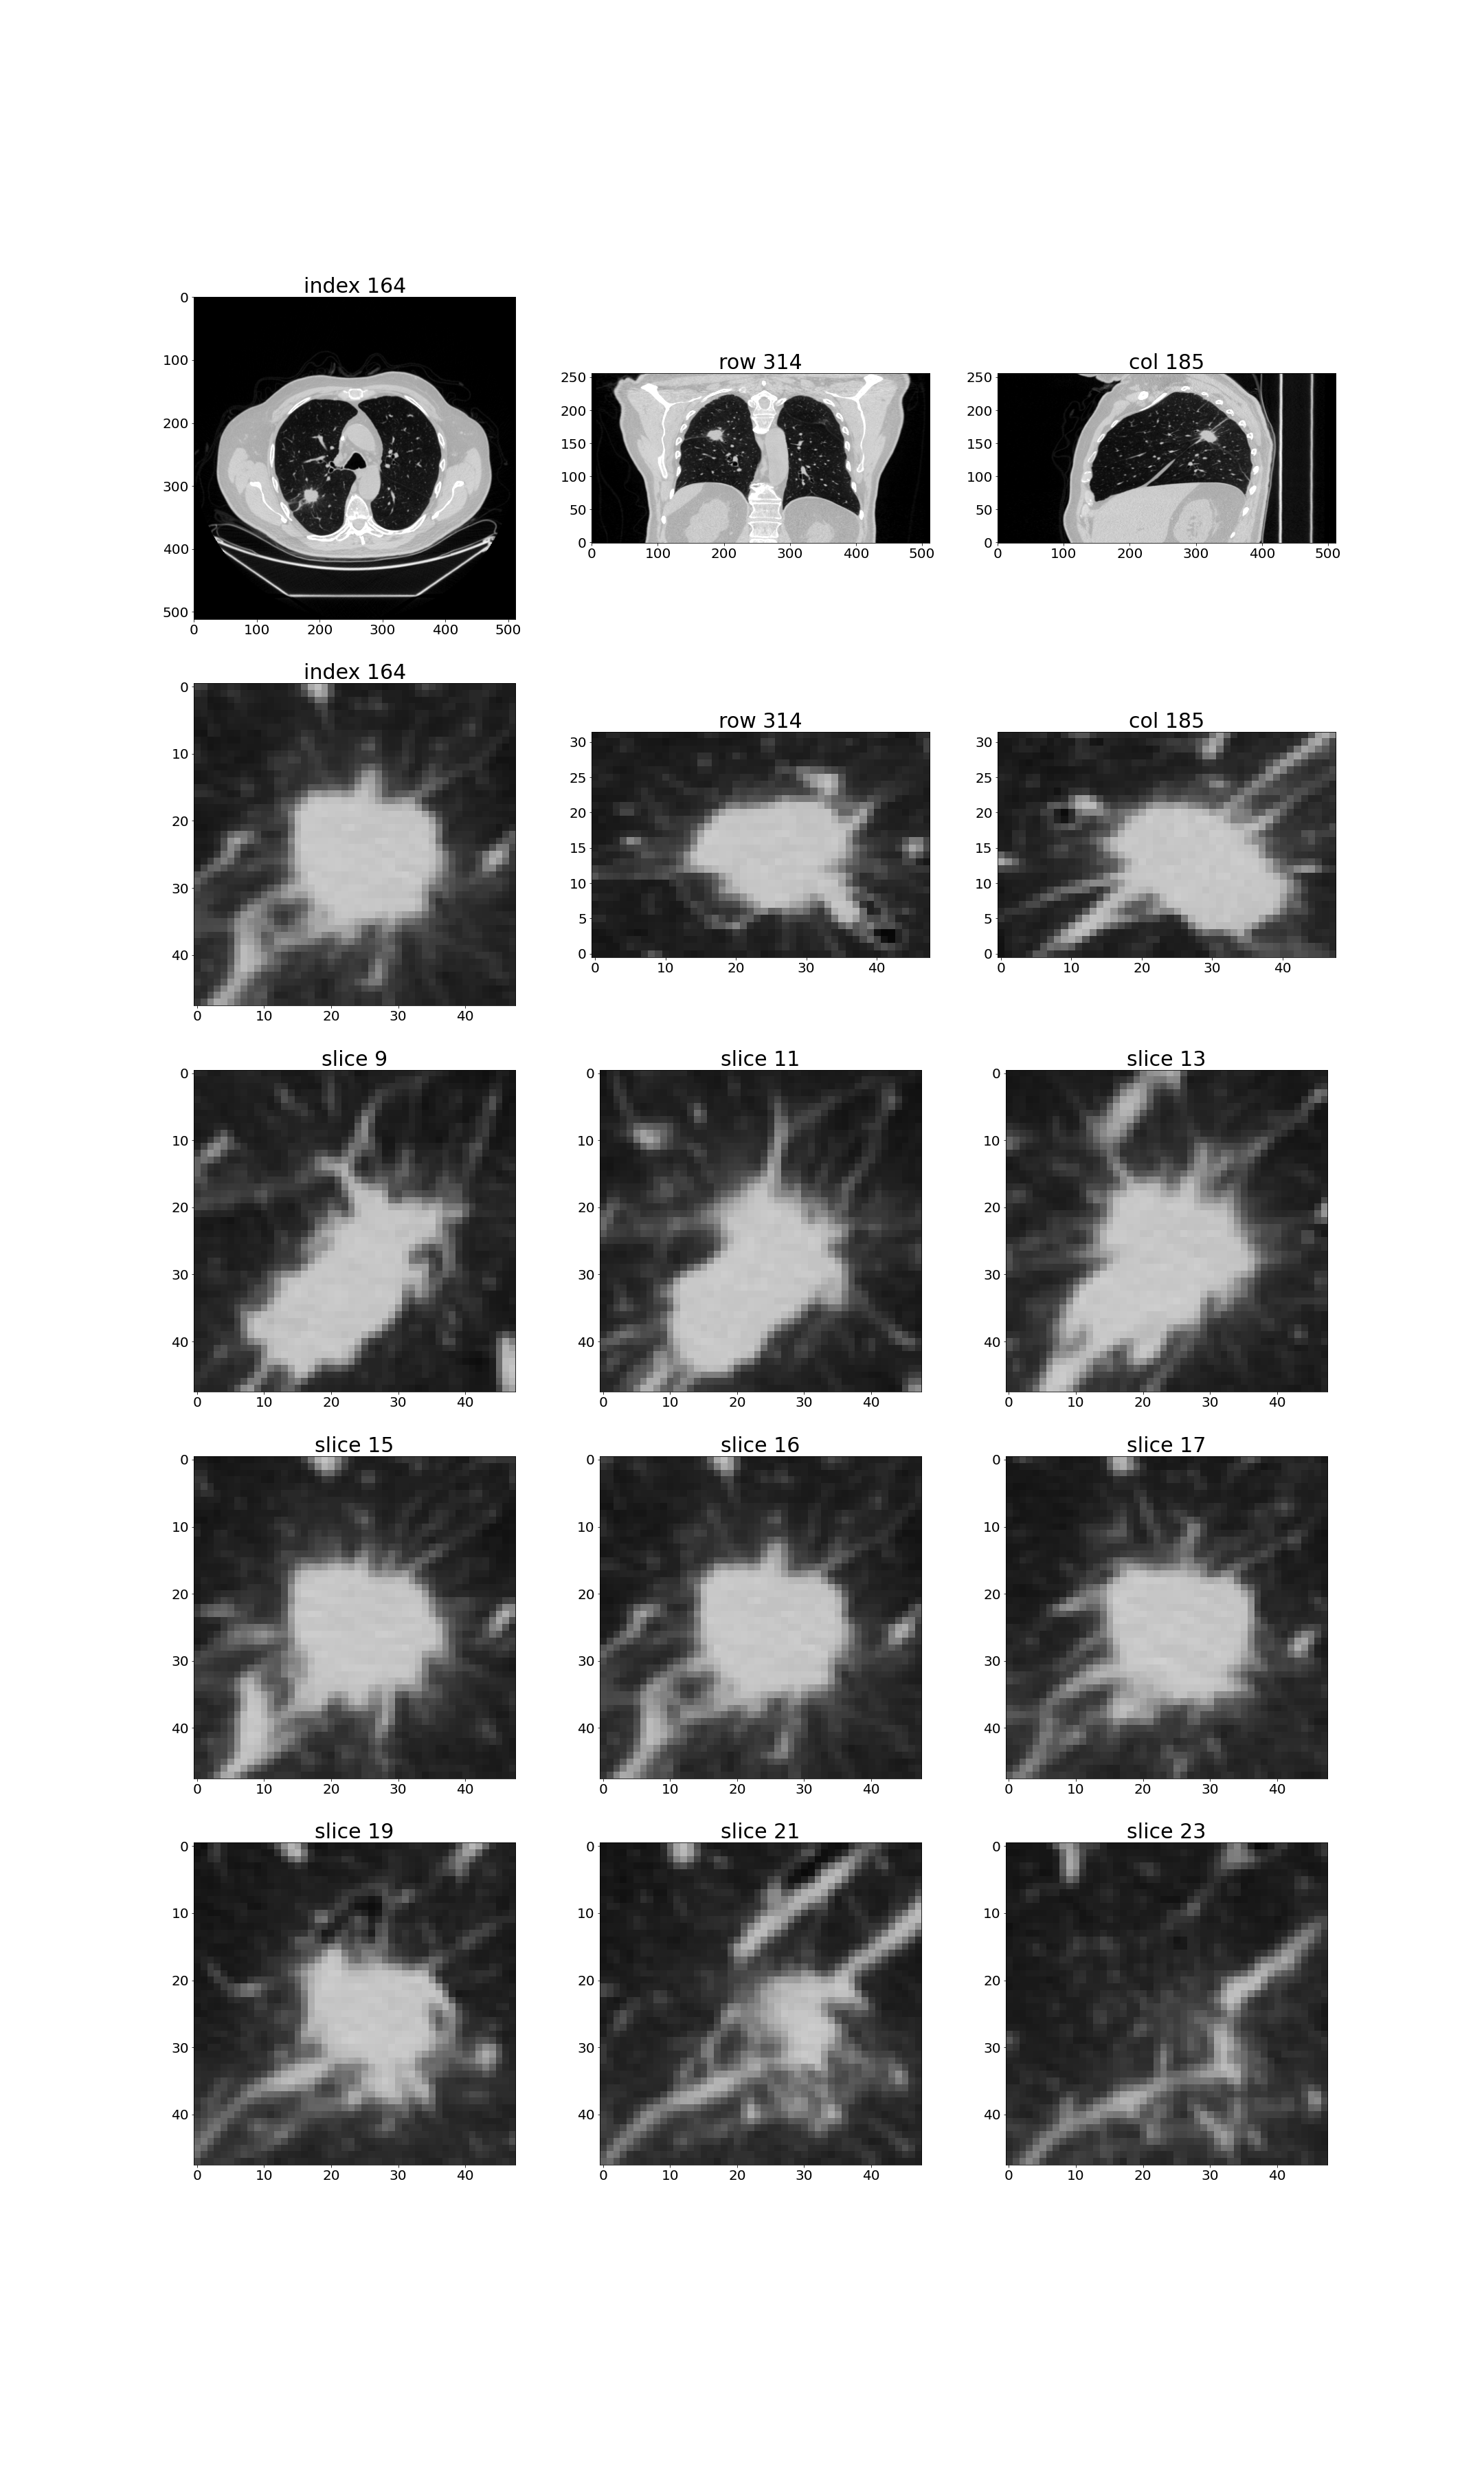

1.3.6.1.4.1.14519.5.2.1.6279.6001.177086402277715068525592995222 0 False [0, 1, 2, 3, 4, 5, 6]


In [11]:
series_uid = positiveSample_list[11][2]
showCandidate(series_uid)

In [12]:
LunaDataset()[0]

2021-06-12 16:15:50,958 INFO     pid:10880 datasets:183:__init__ <datasets.LunaDataset object at 0x000001D76999F460>: 754975 training samples


(tensor([[[[-846., -849., -823.,  ..., -854., -849., -856.],
           [-845., -815., -798.,  ..., -875., -869., -863.],
           [-799., -738., -782.,  ..., -801., -823., -839.],
           ...,
           [-890., -898., -848.,  ..., -800., -789., -742.],
           [-892., -899., -884.,  ..., -771., -659., -452.],
           [-875., -906., -905.,  ..., -540., -330., -153.]],
 
          [[-897., -850., -793.,  ..., -909., -884., -874.],
           [-864., -777., -685.,  ..., -891., -906., -900.],
           [-792., -719., -708.,  ..., -833., -859., -880.],
           ...,
           [-837., -858., -868.,  ..., -809., -807., -731.],
           [-813., -840., -870.,  ..., -720., -571., -390.],
           [-767., -833., -910.,  ..., -476., -258., -154.]],
 
          [[-855., -861., -867.,  ..., -917., -906., -900.],
           [-845., -850., -848.,  ..., -868., -894., -886.],
           [-855., -854., -873.,  ..., -861., -891., -901.],
           ...,
           [-877., -887., -893.

### SCIPY Visualization

In [14]:
import scipy.ndimage.morphology
def build2dLungMask(ct, mask_ndx, threshold_gcc = 0.7):
    dense_mask = ct.hu_a[mask_ndx] > threshold_gcc
    denoise_mask = scipy.ndimage.morphology.binary_closing(dense_mask, iterations=2)
    tissue_mask = scipy.ndimage.morphology.binary_opening(denoise_mask, iterations=10)
    body_mask = scipy.ndimage.morphology.binary_fill_holes(tissue_mask)
    air_mask = scipy.ndimage.morphology.binary_fill_holes(body_mask & ~tissue_mask)

    lung_mask = scipy.ndimage.morphology.binary_dilation(air_mask, iterations=2)

    return air_mask, lung_mask, dense_mask, denoise_mask, tissue_mask, body_mask


def build3dLungMask(ct):
    air_mask, lung_mask, dense_mask, denoise_mask, tissue_mask, body_mask = mask_list = \
        [np.zeros_like(ct.hu_a, dtype=np.bool) for _ in range(6)]

    for mask_ndx in range(ct.hu_a.shape[0]):
        for i, mask_ary in enumerate(build2dLungMask(ct, mask_ndx)):
            mask_list[i][mask_ndx] = mask_ary

    return air_mask, lung_mask, dense_mask, denoise_mask, tissue_mask, body_mask

In [15]:
from datasets import getCt
ct = getCt(series_uid)
air_mask, lung_mask, dense_mask, denoise_mask, tissue_mask, body_mask = build3dLungMask(ct)

In [ ]:
## TO-DO